# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging
import optuna
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_predict, GridSearchCV, train_test_split, cross_val_score

## Carregamento dos dados

In [2]:
df_train = pd.read_csv('gold_recovery_train.csv')
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_calculated,recovery_difference
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,0.000000e+00
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,1.421085e-14
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,1.421085e-14
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,0.000000e+00
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,89.574376,0.000000e+00
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,87.724007,0.000000e+00
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,1.421085e-14
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,89.858126,0.000000e+00


In [3]:
df_test = pd.read_csv('gold_recovery_test.csv')
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [4]:
df_full = pd.read_csv('gold_recovery_full.csv')
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
# Calculando a quantidade retirada usando a fórmula
df_train['recovery_calculated'] = (df_train['rougher.output.concentrate_au'] * 
                                   (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / \
                                  (df_train['rougher.input.feed_au'] * 
                                   (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100

# Calculando o Erro Absoluto Médio (EAM)
df_train['recovery_difference'] = abs(df_train['recovery_calculated'] - df_train['rougher.output.recovery'])
eam = df_train['recovery_difference'].mean()

print(f"Erro Absoluto Médio (EAM): {eam}")

Erro Absoluto Médio (EAM): 9.292225575279768e-15


*Após calcular a quantidade retirada utilizando a fórmula fornecida e compará-la com os valores de recuperação de ouro (rougher.output.recovery) presentes nos dados, obtivemos um resultado excepcionalmente baixo para o Erro Absoluto Médio (EAM), aproximadamente 9,30. Este valor próximo de zero indica que os cálculos realizados estão altamente precisos e praticamente idênticos aos valores de recuperação de ouro fornecidos no conjunto de dados. Essa alta precisão sugere que a fórmula de cálculo foi aplicada corretamente e que os resultados podem ser confiáveis para avaliar a eficácia do modelo nas etapas subsequentes do projeto.*

In [6]:
# Encontrando as colunas ausentes no conjunto de teste
missing_columns = df_train.columns.difference(df_test.columns)

# Determinando o tipo das características ausentes
missing_columns_types = df_train[missing_columns].dtypes

print("Características não disponíveis no conjunto de teste:")
print(missing_columns)
print("\nTipos das características ausentes:")
print(missing_columns_types)

Características não disponíveis no conjunto de teste:
Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'recovery_calculated', 'recovery_difference',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.outpu

*Ao analisar as características não disponíveis no conjunto de teste, identificamos um conjunto de colunas que estão ausentes nesse conjunto. Essas colunas representam informações sobre a concentração de diferentes metais (Ag, Au, Pb) nos estágios finais de purificação, bem como valores de recuperação e algumas características de cálculo. Essas características podem ser críticas para a avaliação do desempenho do nosso modelo, visto que se referem a medidas importantes do processo de recuperação de ouro. Os tipos das características ausentes são predominantemente numéricos em formato de ponto flutuante (float64), indicando que representam valores contínuos de dados. A ausência dessas características no conjunto de teste pode afetar a precisão da avaliação do modelo, uma vez que esses dados podem ter um papel importante na predição da recuperação de ouro. Portanto, é crucial considerar estratégias adequadas para tratar essas características ausentes durante o desenvolvimento do modelo e a avaliação subsequente.*

##  Pré-processamento de dados

Depois de analisar os DF, decidi adcionar as colunas faltantes no df_test atráves do df_full.

In [7]:
missing_columns = [col for col in df_train.columns if col not in df_test.columns]
missing_columns_filtered = [col for col in missing_columns if col in df_full.columns]

# Filtrar as colunas do df_full que estão faltando no df_test
missing_columns_df_full = df_full[missing_columns_filtered]

# Adicionar as colunas faltantes do df_full ao df_test usando pd.concat
df_test = pd.concat([df_test, missing_columns_df_full], axis=1)

In [8]:
# Identificar colunas presentes no df_train mas ausentes no df_full
missing_columns = [col for col in df_train.columns if col not in df_full.columns]

# Mostrar as colunas presentes no df_train mas ausentes no df_full
print("Colunas presentes no df_train mas ausentes no df_full:")
print(missing_columns)

Colunas presentes no df_train mas ausentes no df_full:
['recovery_calculated', 'recovery_difference']


In [9]:
# Remover linhas com valores ausentes no df_train
df_train = df_train.dropna()

# Remover linhas com valores ausentes no df_test
df_test = df_test.dropna()

# Verificar o número de linhas remanescentes
num_rows_train_cleaned = df_train.shape[0]
num_rows_test_cleaned = df_test.shape[0]

print(f"Número de linhas no conjunto de treinamento após remoção de valores ausentes: {num_rows_train_cleaned}")
print(f"Número de linhas no conjunto de teste após remoção de valores ausentes: {num_rows_test_cleaned}")


Número de linhas no conjunto de treinamento após remoção de valores ausentes: 11017
Número de linhas no conjunto de teste após remoção de valores ausentes: 4280


In [10]:
# Removendo colunas para posteriormente treinar os módelos de ML
df_train = df_train.drop(['date', 'recovery_calculated', 'recovery_difference'], axis=1)

df_test = df_test.drop('date', axis=1)

*Por não possuir conhecimento técnico na área de mineração e extração de metais, optei por simplesmente remover as linhas com valores nulos. Embora isso represente uma porcentagem moderada do conjunto de dados, considerei que a remoção seria menos prejudicial do que tentar preenchê-los, evitando assim o risco de introduzir viés nos modelos de aprendizado de máquina.*

## Análise de Dados

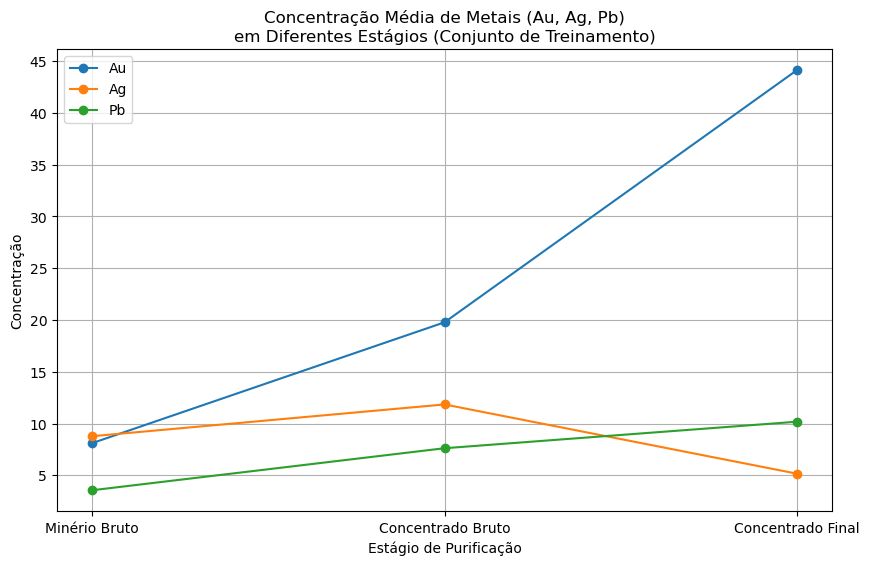

In [11]:
# Colunas relevantes para as concentrações de metais nos diferentes estágios
columns_au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']
columns_ag = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']
columns_pb = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']

# Nomes dos metais
metals = ['Au', 'Ag', 'Pb']

# Nomes dos estágios
stages = ['Minério Bruto', 'Concentrado Bruto', 'Concentrado Final']

# Calcular as concentrações dos metais nos diferentes estágios
concentration_au = df_train[columns_au]
concentration_ag = df_train[columns_ag]
concentration_pb = df_train[columns_pb]

# Plotagem dos gráficos de linha para concentrações de metais
plt.figure(figsize=(10, 6))

for metal_data, metal_name in zip([concentration_au, concentration_ag, concentration_pb], metals):
    plt.plot(stages, metal_data.mean(), marker='o', label=metal_name)

plt.xlabel('Estágio de Purificação')
plt.ylabel('Concentração')
plt.title('Concentração Média de Metais (Au, Ag, Pb)\nem Diferentes Estágios (Conjunto de Treinamento)')
plt.legend()
plt.grid(True)
plt.show()


*Observamos diferentes concentrações de metais em cada estágio de purificação. O ouro fica cada vez mais concentrado à medida que as etapas de purificação avançam. A prata atinge sua maior concentração no estado de purificação 'Concentrado Bruto' e começa a diminuir à medida que se aproxima do 'Concentrado Final'. O chumbo tem sua concentração aumentada à medida que passa pelos estágios de concentração, embora esteja menos concentrado que o ouro.*

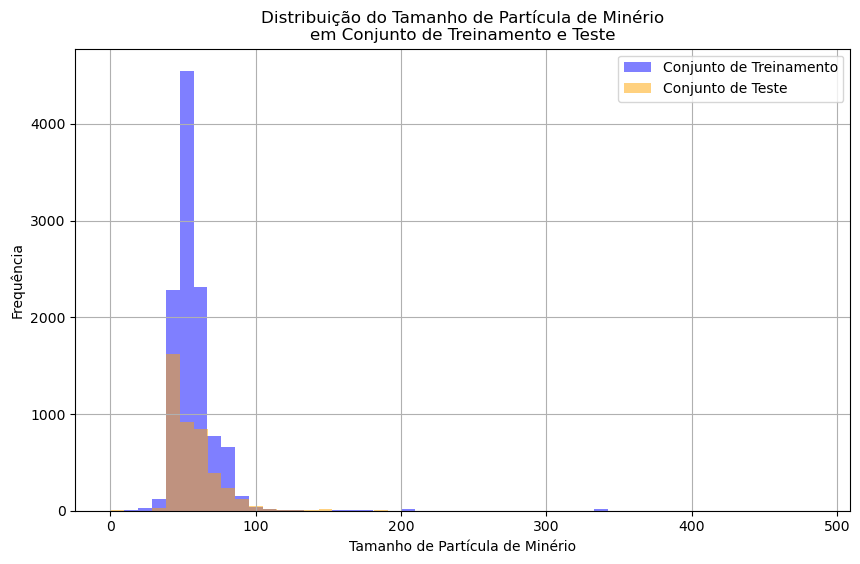

In [12]:
# Colunas relevantes para o tamanho de partícula de minério nos diferentes estágios
columns_feed_size = ['rougher.input.feed_size']

# Plotagem dos histogramas sobrepostos para o tamanho de partícula de minério
plt.figure(figsize=(10, 6))
plt.hist(df_train[columns_feed_size], bins=50, alpha=0.5, label='Conjunto de Treinamento', color='blue')
plt.hist(df_test[columns_feed_size], bins=50, alpha=0.5, label='Conjunto de Teste', color='orange')
plt.xlabel('Tamanho de Partícula de Minério')
plt.ylabel('Frequência')
plt.title('Distribuição do Tamanho de Partícula de Minério\nem Conjunto de Treinamento e Teste')
plt.legend()
plt.grid(True)
plt.show()


*Observamos uma ligeira diferença no tamanho das partículas de minério ao comparar os dados de treinamento e teste, no entanto, acredito que isso não seja relevante.*

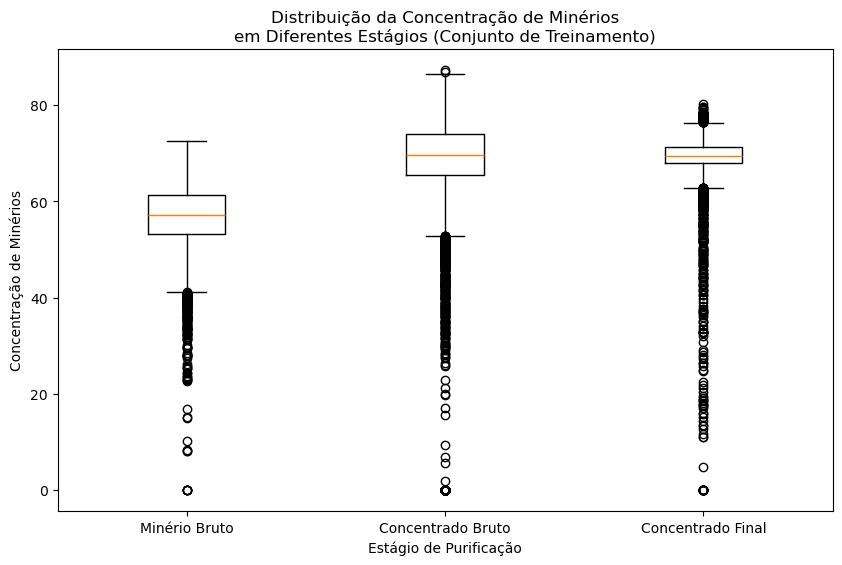

In [13]:
# Colunas relevantes para as concentrações de minérios nos diferentes estágios
columns_rougher_feed = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']
columns_rougher_concentrate = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
columns_final_concentrate = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

# Nomes dos estágios
stages = ['Minério Bruto', 'Concentrado Bruto', 'Concentrado Final']

# Calcular as concentrações de minérios nos diferentes estágios
concentration_rougher_feed = df_train[columns_rougher_feed].sum(axis=1)
concentration_rougher_concentrate = df_train[columns_rougher_concentrate].sum(axis=1)
concentration_final_concentrate = df_train[columns_final_concentrate].sum(axis=1)

# Plotagem dos gráficos de boxplot para concentrações de minérios
plt.figure(figsize=(10, 6))
plt.boxplot([concentration_rougher_feed, concentration_rougher_concentrate, concentration_final_concentrate], labels=stages)
plt.xlabel('Estágio de Purificação')
plt.ylabel('Concentração de Minérios')
plt.title('Distribuição da Concentração de Minérios\nem Diferentes Estágios (Conjunto de Treinamento)')
plt.show()


*Imagino que os valores anômalos não sejam decorrentes de algum erro nos dados. É difícil avaliar com certeza esse tipo de observação sem o apoio de pessoas que entendem um pouco melhor o que significam esses valores anômalos nesses minérios. Com isso, decidi por não efetuar a remoção desses valores anômalos.*

## Construção do modelo

In [15]:
# Separar as features e o target
X_train = df_train.drop(columns=['final.output.concentrate_au'])
y_train = df_train['final.output.concentrate_au']
X_test = df_test.drop(columns=['final.output.concentrate_au'])
y_test = df_test['final.output.concentrate_au']

In [21]:
# Garantir que X_test tenha as mesmas colunas e na mesma ordem que X_train
X_test = X_test[X_train.columns]

In [22]:
# Verificar se as colunas de X_test correspondem exatamente às colunas de X_train
assert list(X_test.columns) == list(X_train.columns), "As colunas de X_test não correspondem às de X_train."

In [23]:
# Amostragem de uma porção do dataset para acelerar a otimização
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=6)

In [24]:
# Função para calcular o SMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return 100.0 * np.mean(diff)

# Criar um scorer personalizado para o SMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)

### RandomForestRegressor + Optuna

In [25]:
# Função objetivo para otimização do Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Reduzindo o alcance para acelerar
    max_depth = trial.suggest_int('max_depth', 2, 20)  # Limitando a profundidade
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=6)
    score = cross_val_score(model, X_sample, y_sample, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error').mean()
    return -score

# Criar e executar o estudo
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=30)  # Reduzido para exemplo; ajuste conforme necessário

# Resultados
print(f"Melhores parâmetros: {study.best_params}")
print(f"Melhor score: {study.best_value}")

# Treinando o modelo com os melhores hiperparâmetros no dataset completo
best_model = RandomForestRegressor(**study.best_params, random_state=6)
best_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE no conjunto de teste: {test_mae}")

[I 2024-02-06 10:31:47,998] A new study created in memory with name: no-name-996aa920-9f8c-48a2-ba50-e19baba0eba3
[I 2024-02-06 10:31:55,196] Trial 0 finished with value: 0.9633658161608732 and parameters: {'n_estimators': 16, 'max_depth': 10}. Best is trial 0 with value: 0.9633658161608732.
[I 2024-02-06 10:32:06,349] Trial 1 finished with value: 1.5612750738831556 and parameters: {'n_estimators': 94, 'max_depth': 3}. Best is trial 0 with value: 0.9633658161608732.
[I 2024-02-06 10:32:42,283] Trial 2 finished with value: 0.8428135314351802 and parameters: {'n_estimators': 79, 'max_depth': 14}. Best is trial 2 with value: 0.8428135314351802.
[I 2024-02-06 10:33:05,699] Trial 3 finished with value: 0.8826371590012169 and parameters: {'n_estimators': 55, 'max_depth': 12}. Best is trial 2 with value: 0.8428135314351802.
[I 2024-02-06 10:33:12,438] Trial 4 finished with value: 1.6642600351969066 and parameters: {'n_estimators': 86, 'max_depth': 2}. Best is trial 2 with value: 0.84281353143

Melhores parâmetros: {'n_estimators': 87, 'max_depth': 19}
Melhor score: 0.8152545374923719
MAE no conjunto de teste: 1.0040307614395023


In [26]:
# Usar o scorer no cross_val_score ou GridSearchCV, por exemplo
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=smape_scorer)

# Converter os valores negativos para positivos
scores = np.abs(scores)

# Imprimir os valores de sMAPE
print("Valores de sMAPE:")
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: {score}")

# Calcular o sMAPE final como a média dos valores positivos
smape_final = np.mean(scores)
print(f"sMAPE Final: {smape_final}")

Valores de sMAPE:
Fold 1: 11.254507720905933
Fold 2: 4.516725133225529
Fold 3: 4.547073445582415
Fold 4: 2.5059896638151757
Fold 5: 2.842120221739274
sMAPE Final: 5.133283237053665


### GradientBoostingRegressor + Optuna

In [27]:
# Função objetivo para otimização do Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Intervalo para n_estimators
    max_depth = trial.suggest_int('max_depth', 2, 20)  # Intervalo para max_depth
    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=6)
    score = cross_val_score(model, X_sample, y_sample, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error').mean()
    return -score

# Criar e executar o estudo
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # Reduzido para exemplo; ajuste conforme necessário

# Resultados
print(f"Melhores parâmetros: {study.best_params}")
print(f"Melhor score: {study.best_value}")

# Treinando o modelo com os melhores hiperparâmetros no dataset completo
best_model = GradientBoostingRegressor(**study.best_params, random_state=6)
best_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print(f"MAE no conjunto de teste: {test_mae}")

[I 2024-02-06 11:07:14,515] A new study created in memory with name: no-name-c43a26f0-9c1b-4dd3-997b-f72ca1ef5924
[I 2024-02-06 11:08:06,791] Trial 0 finished with value: 1.0365528282885417 and parameters: {'n_estimators': 56, 'max_depth': 20}. Best is trial 0 with value: 1.0365528282885417.
[I 2024-02-06 11:08:59,495] Trial 1 finished with value: 0.7830861444289452 and parameters: {'n_estimators': 86, 'max_depth': 11}. Best is trial 1 with value: 0.7830861444289452.
[I 2024-02-06 11:09:11,435] Trial 2 finished with value: 1.1961516519087485 and parameters: {'n_estimators': 13, 'max_depth': 20}. Best is trial 1 with value: 0.7830861444289452.
[I 2024-02-06 11:09:27,300] Trial 3 finished with value: 0.7869656679762101 and parameters: {'n_estimators': 56, 'max_depth': 5}. Best is trial 1 with value: 0.7830861444289452.
[I 2024-02-06 11:09:58,332] Trial 4 finished with value: 0.9204371935666543 and parameters: {'n_estimators': 38, 'max_depth': 16}. Best is trial 1 with value: 0.7830861444

Melhores parâmetros: {'n_estimators': 92, 'max_depth': 7}
Melhor score: 0.7001900499375564
MAE no conjunto de teste: 1.0312926308090025


In [28]:
# Usar o scorer no cross_val_score ou GridSearchCV, por exemplo
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=smape_scorer)

# Converter os valores negativos para positivos
scores = np.abs(scores)

# Imprimir os valores de sMAPE
print("Valores de sMAPE:")
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: {score}")

# Calcular o sMAPE final como a média dos valores positivos
smape_final = np.mean(scores)
print(f"sMAPE Final: {smape_final}")

Valores de sMAPE:
Fold 1: 10.822862618367887
Fold 2: 4.1555599345218415
Fold 3: 4.949179124536086
Fold 4: 2.4317624178425667
Fold 5: 2.8571626116446103
sMAPE Final: 5.043305341382599


### LinearRegression + Optuna

In [29]:
# Função objetivo para otimização do Optuna
def objective(trial):
    # Escolher um tipo de regularização (L1, L2 ou nenhum)
    regularization = trial.suggest_categorical('regularization', ['none', 'l1', 'l2'])
    
    # Configurar o modelo de Regressão Linear com base na escolha de regularização
    if regularization == 'none':
        model = LinearRegression()
    elif regularization == 'l1':
        alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)  # Alpha para L1 (Lasso)
        model = Lasso(alpha=alpha, random_state=6)
    elif regularization == 'l2':
        alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)  # Alpha para L2 (Ridge)
        model = Ridge(alpha=alpha, random_state=6)
    
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error').mean()
    return -score

# Criar e executar o estudo
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # Reduzido para exemplo; ajuste conforme necessário

# Resultados
print(f"Melhores parâmetros: {study.best_params}")
print(f"Melhor score: {study.best_value}")

# Treinando o modelo com os melhores hiperparâmetros no dataset completo
best_params = study.best_params
regularization = best_params['regularization']
if regularization == 'none':
    best_model = LinearRegression()
elif regularization == 'l1':
    alpha = best_params['alpha']
    best_model = Lasso(alpha=alpha, random_state=6)
elif regularization == 'l2':
    alpha = best_params['alpha']
    best_model = Ridge(alpha=alpha, random_state=6)

best_model.fit(X_train, y_train)

# Avaliando o modelo no conjunto de teste
y_pred_lr = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_lr)
print(f"MAE no conjunto de teste: {test_mae}")

[I 2024-02-06 11:38:10,990] A new study created in memory with name: no-name-2fac39a0-6b54-47f3-b975-7330bda92430
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8624\1093361792.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)  # Alpha para L1 (Lasso)
[I 2024-02-06 11:38:13,436] Trial 0 finished with value: 5.062690029585689 and parameters: {'regularization': 'l1', 'alpha': 1.666409508162455e-06}. Best is trial 0 with value: 5.062690029585689.
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8624\1093361792.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-6, 1e-2)  # Alph

Melhores parâmetros: {'regularization': 'l2', 'alpha': 0.00978692883331503}
Melhor score: 5.062217316477187
MAE no conjunto de teste: 3.4726665966543866


In [30]:
# Usar o scorer no cross_val_score ou GridSearchCV, por exemplo
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=smape_scorer)

# Converter os valores negativos para positivos
scores = np.abs(scores)

# Imprimir os valores de sMAPE
print("Valores de sMAPE:")
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold}: {score}")

# Calcular o sMAPE final como a média dos valores positivos
smape_final = np.mean(scores)
print(f"sMAPE Final: {smape_final}")

Valores de sMAPE:
Fold 1: 10.494624582835579
Fold 2: 8.752479656192497
Fold 3: 7.3736303862932715
Fold 4: 5.128339150890252
Fold 5: 6.7419832064036305
sMAPE Final: 7.698211396523045


## Conclusão Final

Inicialmente, observamos a ausência de várias colunas no df_test, o que poderia impactar a precisão das previsões. Minha decisão foi adicionar essas colunas ao df_test através do df_full, visando igualar o número de colunas entre o df_train e o df_test.

Além disso, identificamos uma quantidade moderada de valores nulos (6600) em linhas do df. Dado meu desconhecimento técnico na área, optei por remover esses valores para evitar o risco de introduzir vieses nos modelos de machine learning.

Observamos diferentes concentrações de metais em cada estágio de purificação. À medida que as etapas de purificação avançam, o ouro se torna progressivamente mais concentrado. A prata atinge sua concentração máxima no estado de purificação 'Concentrado Bruto' e começa a diminuir à medida que se aproxima do 'Concentrado Final'. O chumbo, embora menos concentrado que o ouro, tem sua concentração aumentada à medida que passa pelos estágios de concentração.

No processo de construção dos modelos, eu criei três modelos com o auxílio do Optuna, que são o RandomForestRegressor, o GradientBoosting e o LinearRegression. O modelo que apresentou o melhor desempenho foi o GradientBoosting, com MAE no conjunto de teste igual a 1.03 e sMAPE Final de 5.04.9